# Import data and remodify it to be monthly

In [13]:
#import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('./london_weather.csv')
df.drop(columns = ['snow_depth'], inplace = True) # drop the entire column named 'snow_depth'
df.dropna(inplace= True) # drop any NaN 

# if there is NaN data dropped, there will be a gap between index, this code is to reset indexes to be sequent
df.reset_index(drop=True, inplace=True)

# get mean monthly temp
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d') # read 'date' as YearMonthDay, no space or other symbols in the middle
df['month'] = pd.DatetimeIndex(df['date']).month # store the value of Month
df['year'] = pd.DatetimeIndex(df['date']).year # store the value of Year
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M') # combine Year and Month because data will be turned to be monthly
df=df.groupby('month_year').mean() # calculate the average of values in the same month_year in the same column

df.reset_index(drop=True, inplace=True) # reset the index because ACF and PACF plot do not use date as indexes

df # show



C:\Users\CJyM2\AppData\Local\Temp\ipykernel_39072\1817211686.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('month_year').mean() # calculate the average of values in the same month_year in the same column


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,month,year
0,5.724138,2.017241,29.965517,4.144828,0.527586,-2.641379,2.058621,101120.689655,1.0,1979.0
1,6.360000,1.948000,45.440000,4.428000,2.028000,-0.348000,1.744000,101061.600000,2.0,1979.0
2,5.967742,3.212903,93.354839,9.238710,5.587097,1.993548,3.061290,100459.032258,3.0,1979.0
3,6.133333,3.543333,134.166667,12.520000,8.743333,4.810000,2.586667,101165.333333,4.0,1979.0
4,5.290323,6.470968,204.064516,16.206452,11.490323,7.151613,2.806452,101362.580645,5.0,1979.0
...,...,...,...,...,...,...,...,...,...,...
499,5.066667,5.976667,208.100000,25.200000,20.393333,15.640000,1.873333,101219.333333,8.0,2020.0
500,4.200000,6.540000,170.000000,21.693333,16.616667,11.580000,0.640000,101695.000000,9.0,2020.0
501,5.733333,1.780000,70.533333,14.970000,11.933333,8.933333,4.773333,100794.333333,10.0,2020.0
502,5.933333,1.716667,43.166667,12.636667,9.806667,7.026667,1.660000,101939.000000,11.0,2020.0


# Find d

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.mean_temp.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if p<0.05, stationary, no differencing required, 
# d=0


ADF Statistic: -3.153432
p-value: 0.022843


# ACF plots

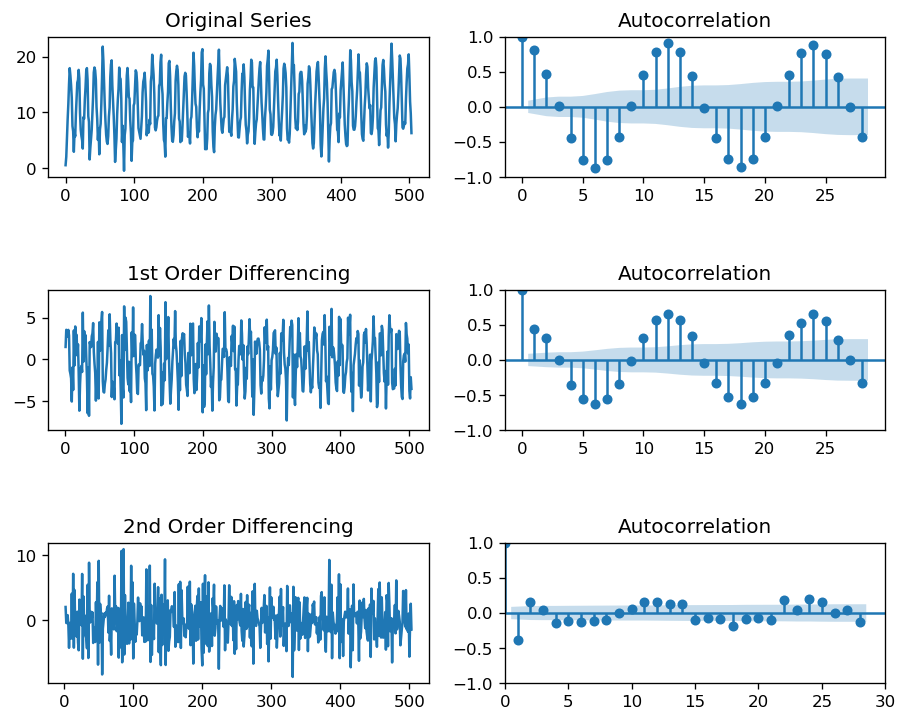

In [35]:
# testing d stationary
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2) #3 rows and 2 columns for 6 subplots in total
plt.subplots_adjust(hspace=0.8)# expand the gap between rows

# Original Series
axes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')
plot_acf(df.mean_temp, ax=axes[0, 1])
plt.xlim(0, 30)# limit the x-axis to [0,30] because there are too much data and values after 30 are insignificant

# 1st Differencing
axes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.mean_temp.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


# PACF plots

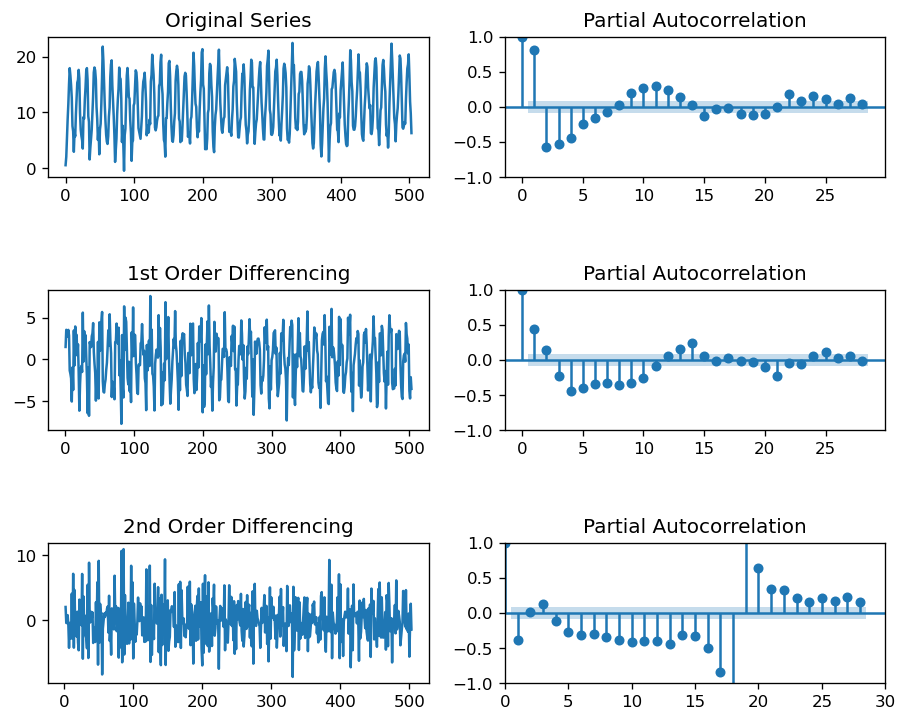

In [36]:
# testing d stationary
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2) #3 rows and 2 columns for 6 subplots in total
plt.subplots_adjust(hspace=0.8)# expand the gap between rows

# axis_range=list(range(0, 30, 5))

# Original Series
axes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')
plot_pacf(df.mean_temp, ax=axes[0, 1])
plt.xlim(0, 30)# limit the x-axis to [0,30] because there are too much data and values after 30 are insignificant
# axes[0, 0].set_xticks(axis_range)

# 1st Differencing
axes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.mean_temp.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
